## Final Project

### Introduction
#### We are going to analyze fordbike dataset and explore all the questions to study the best improvments needed to boost the profit. The dataset contains the following columns: duration_sec,	start_time,	end_time,	start_station_id,	start_station_name,	start_station_latitude,	start_station_longitude,	end_station_id,	end_station_name,	end_station_latitude,	end_station_longitude,	bike_id	user_type,	member_birth_year,	member_gender,	bike_share_for_all_trip. We are interested to study the dataset and extract info as much as possible to acknowledge our target groups.


In [87]:
# All imports needed for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

#### Reading the csv file

In [88]:
#reading the csv file
df = pd.read_csv('../input/fordbikeudacity/fordbike (1).csv')
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


#### Checking out the total number of entries, total number of columns, and total number of nan values per column

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [90]:
# Changing from object to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [91]:
# Lets check the distribution of the numerical columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [92]:
#check for duplicated rows
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
183407    False
183408    False
183409    False
183410    False
183411    False
Length: 183412, dtype: bool

In [93]:
# Drop duplicates if they occur and recheck the number of entries to see if any rows are dropped
df.drop_duplicates(inplace=True)


In [94]:
# Droppin rows with na values in station names and ids and gender
df = df[df['start_station_id'].notna()]
df = df[df['member_gender'].notna()]

In [95]:
#Fill in birth year with median value
df['member_birth_year'].fillna((df['member_birth_year'].median()), inplace=True)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Feautre Engineering

In [97]:
# month name, weekday, day in month, and time are all extracted from the start time column for further analysis. Age is caluclated using a very simple equation which is 
# today's year vs birth year
df['month_name']=df['start_time'].dt.strftime('%B')
df['weekday']=df['start_time'].dt.strftime('%a')
df['day']=df['start_time'].dt.day.astype(int)
df['time']=df['start_time'].dt.hour

df['age'] = 2021-df.member_birth_year


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_name,weekday,day,time,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,February,Thu,28,17,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,February,Thu,28,12,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,February,Thu,28,17,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,February,Thu,28,23,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,February,Thu,28,23,62.0


## **Exploration**

#### Research Question 1 (Which gender use the fordbike more? )

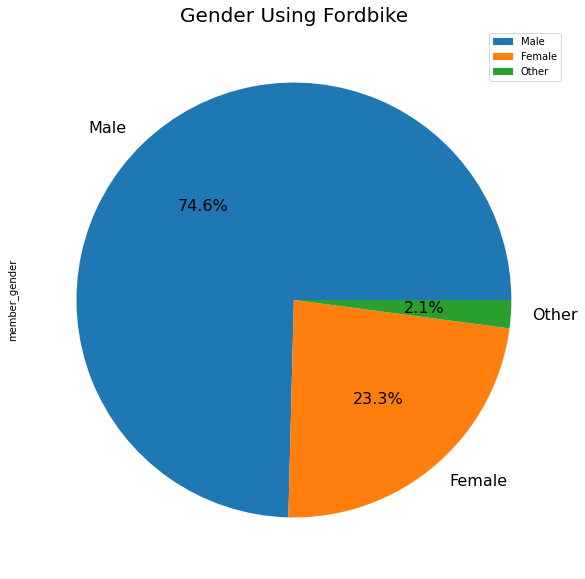

In [98]:
df_gender = df[['member_gender']]
genderPie = df_gender['member_gender'].value_counts()
pieChart = genderPie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 16);
pieChart.set_title("Gender Using Fordbike", fontsize = 20);
plt.legend();

#### More than two third of the users of Fordbike are males. As a result, marketing campaigns related to males interests could be held.

#### Research Question 2 (What is the ratio of subscribers to customers? )

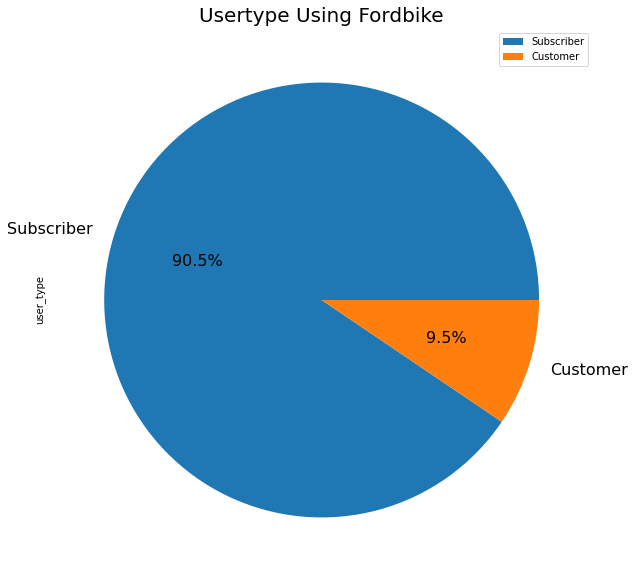

In [99]:
df_user_type = df[['user_type']]
genderPie = df_user_type['user_type'].value_counts()
pieChart = genderPie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 16);
pieChart.set_title("Usertype Using Fordbike", fontsize = 20);
plt.legend();


#### 90.5 % of the users are subscribers which is an excellent ratio. 9.5% are casual riders who do not ride much often. How could we increaste % of subscribers?

#### Research Question 3 (What is percentage of bikeshare for all the trips? )

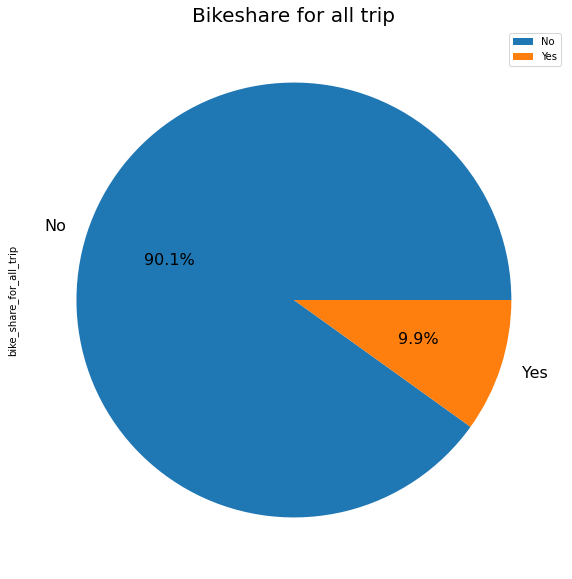

In [25]:
df_bike_share_for_all_trip = df[['bike_share_for_all_trip']]
genderPie = df_bike_share_for_all_trip['bike_share_for_all_trip'].value_counts()
pieChart = genderPie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 16);
pieChart.set_title("Bikeshare for all trip", fontsize = 20);
plt.legend();



#### 90.1% of the users do not use the bikeshare feautre which is pretty huge.

#### Research Question 4 (What is the range age of riders? )

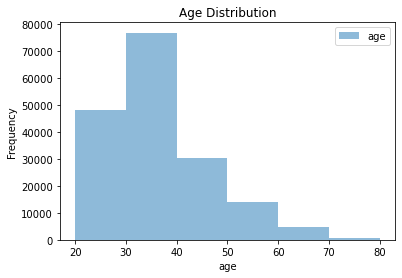

In [100]:
df_age = df[['age','member_gender']]
nowshow_age = df_age.plot.hist(bins=6,range=[20, 80], alpha=0.5, title="Age Distribution")
plt.xlabel('age')
plt.show()

#### The most common age using fordbikes services is between 30 and 40 years old which proves that a huge % of the riders are employees and subscribers who ride back and forth to their workplace.

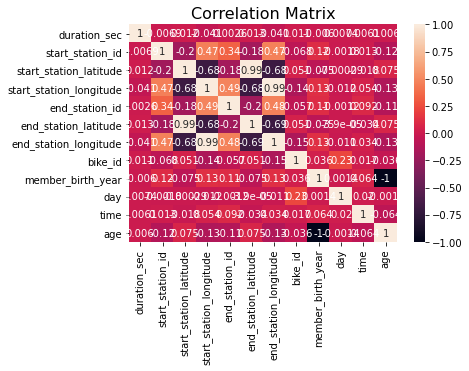

In [101]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix', fontsize=16);

### The correaltion between all paramaters

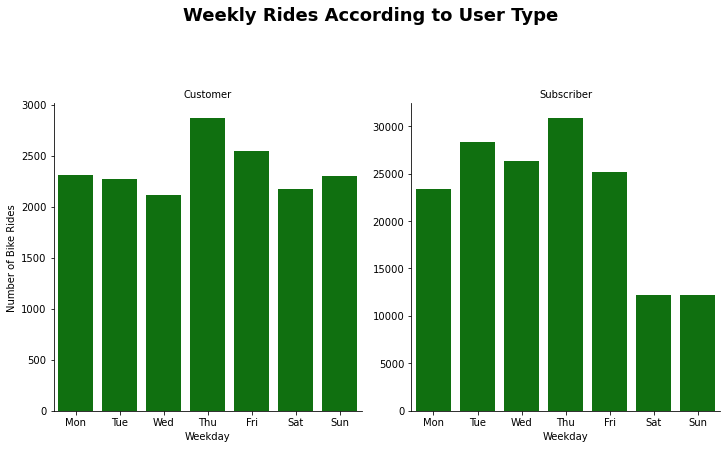

In [109]:
g = sns.catplot(data=df, x='weekday', col="user_type", kind='count', sharey = False, color = 'green', order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Rides According to User Type',y=1.2, fontsize=18, fontweight='bold');

### The above graph shows that subscribers use the bike mostly on weekdays to their workplace, however, customers ride the bike on weekends and weekdays almost equally.

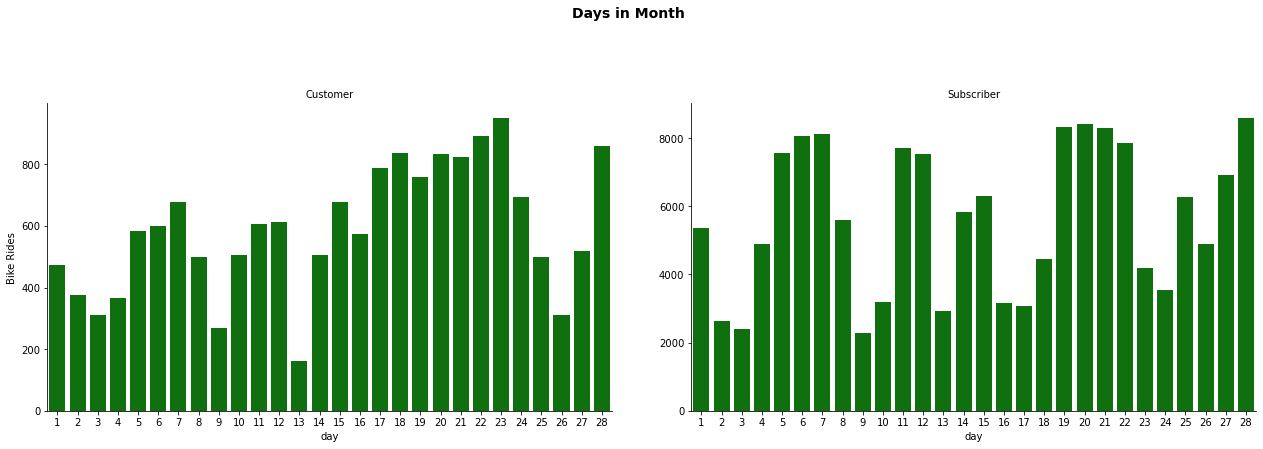

In [113]:
g = sns.catplot(data=df, x='day', col="user_type", kind='count', sharey = False,color = 'green')
g.fig.set_figwidth(18)
g.fig.set_figheight(5)
g.set_axis_labels("day", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Days in Month According to User Type', y=1.2, fontsize=14, fontweight='bold');

### Weekends always show a drop in number of bike rides. A disount and free rides should be offered on weekends to encourage users to ride more.

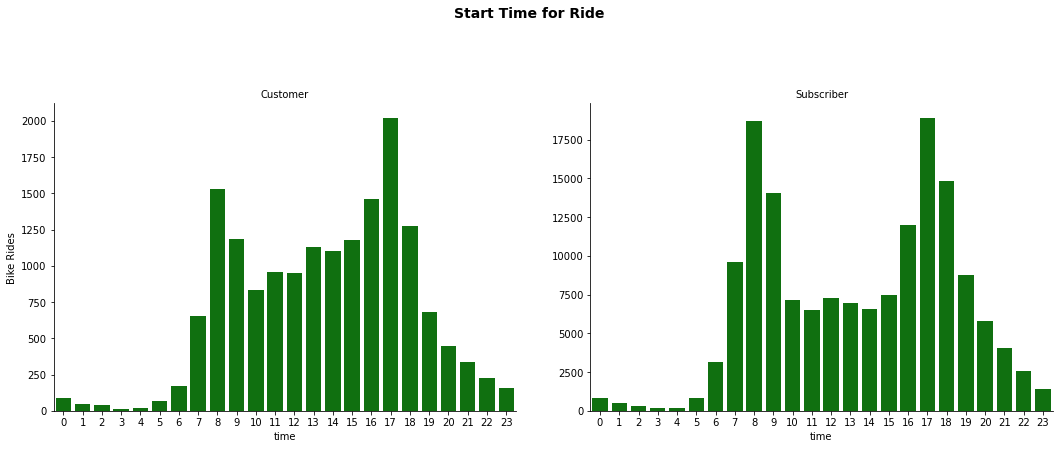

In [114]:
g = sns.catplot(data=df, x='time', col="user_type", kind='count', sharey = False, color = 'green')
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set_axis_labels("time", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Start Time for Ride According to User Type', y=1.2, fontsize=14, fontweight='bold');

### between 12 am and 5 am, number of riders is very limited. As the sun rises and people start to get off to work, number of riders increase gradually.

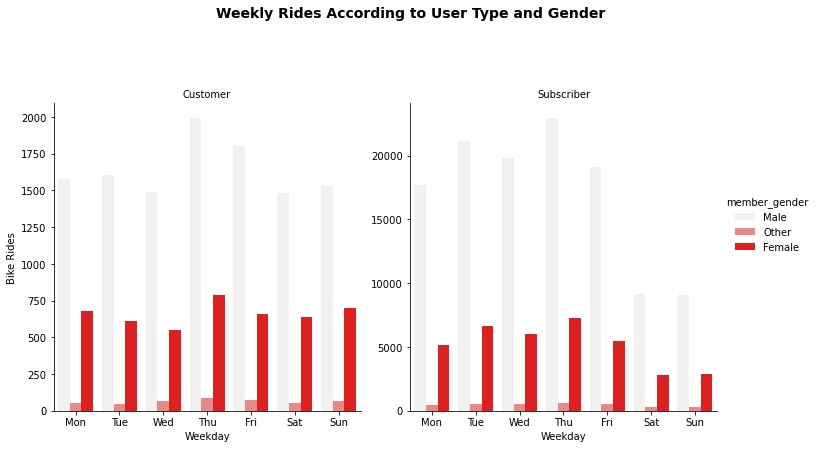

In [118]:
g = sns.catplot(data=df, x='weekday',hue='member_gender' ,col="user_type", kind='count', sharey = False, color = 'red', order = weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Rides According to User Type and Gender', y=1.2, fontsize=14, fontweight='semibold');

#### Male riders are always more than female rider. The trend is almost the same for males and females. Thursday is the best seller day!!

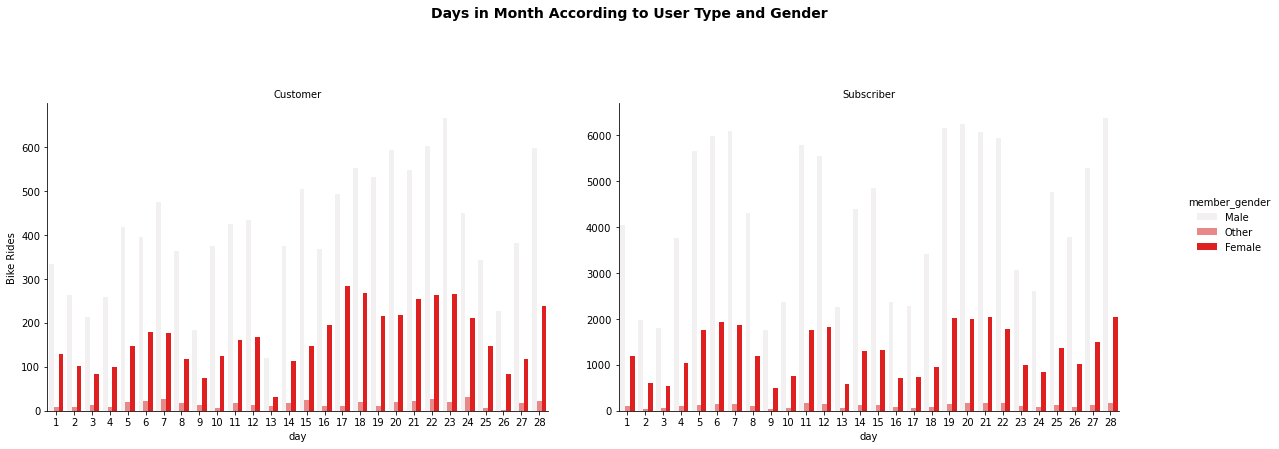

In [119]:
g = sns.catplot(data=df, x='day', hue='member_gender', col="user_type", kind='count', sharey = False, color = 'red')
g.fig.set_figwidth(18)
g.fig.set_figheight(5)
g.set_axis_labels("day", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Days in Month According to User Type and Gender', y=1.2, fontsize=14, fontweight='semibold');

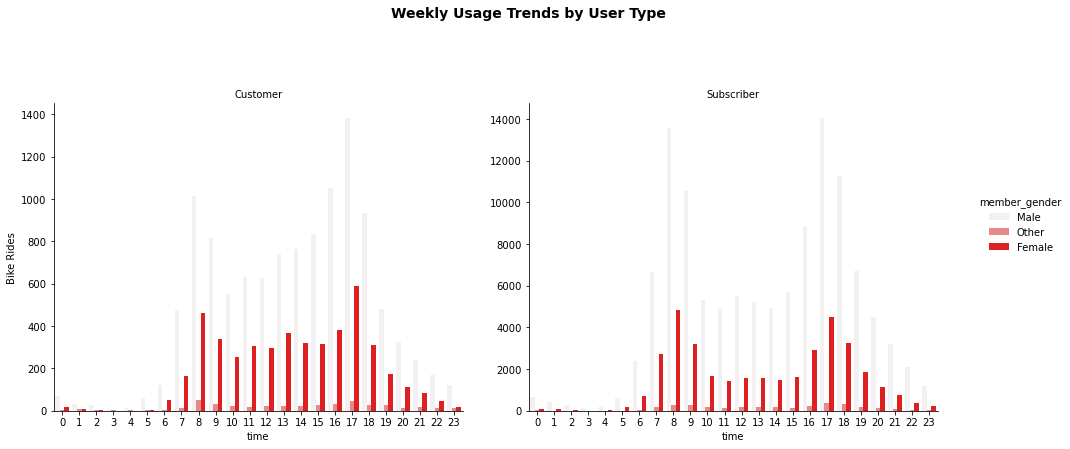

In [120]:
g = sns.catplot(data=df, x='time',hue='member_gender', col="user_type", kind='count', sharey = False, color = 'red')
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set_axis_labels("time", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Usage Trends by User Type', y=1.2, fontsize=14, fontweight='semibold');

### The trend is almost the same for males and females. Subscribers at 9 am is the closest it gets to males and females having the same number of rides. Females never ride more than men at anytime of the day. Very obvious that males are dominating the fordbike services.